In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle

from helpers.evaluation import run_BDTs, run_NNs

In [4]:
# load in the data

bands = ["SBL", "IBL", "SR", "IBH", "SBH"]
data_dict = {}
project_id = "SUSY"

feature_set = ['dijet_pt', 'dijet_eta', 'dijet_mass', 'jet0_btag', 'jet1_btag', 'higgs_pt', 'higgs_eta', 'higgs_mass', 'dimu_pt', 'dimu_eta', 'dimu_mass']
feature_set = [ 'jet0_btag', 'jet1_btag',  'higgs_pt', 'higgs_eta','higgs_mass','dimu_mass']

num_features = len(feature_set)-1

with open(f"processed_data/{project_id}_fullsup", "rb") as infile:
    fullsup_data = pickle.load(infile)

with open(f"processed_data/{project_id}_test", "rb") as infile:
    test_data = pickle.load(infile)


# First eval fullsup

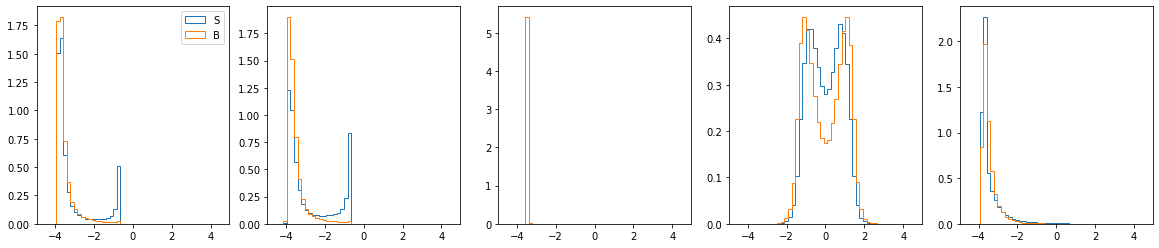

In [5]:
bins = np.linspace(-4.5, 4.5, 50)



fig, ax = plt.subplots(1, num_features, figsize = (20, 4))
for i, feat in enumerate(feature_set[:-1]):
    ax[i].hist(fullsup_data["sig"][feat], bins = bins, label = "S", histtype = "step", density = "True")
    ax[i].hist(fullsup_data["bkg"][feat], bins = bins, label = "B", histtype = "step", density = "True")
    #ax[i].set_yscale("log")

ax[0].legend()
plt.show()

In [6]:
num_runs = 4

# make the datasets

fullsup_bkg = np.empty((fullsup_data["bkg"]["dimu_mass"].shape[0], num_features))
fullsup_sig = np.empty((fullsup_data["sig"]["dimu_mass"].shape[0], num_features))
test_bkg = np.empty((test_data["bkg"]["dimu_mass"].shape[0], num_features))
test_sig = np.empty((test_data["sig"]["dimu_mass"].shape[0], num_features))


for i, feat in enumerate(feature_set[:-1]):
    fullsup_bkg[:,i] = fullsup_data["bkg"][feat].reshape(-1,)
    fullsup_sig[:,i] = fullsup_data["sig"][feat].reshape(-1,)
    test_bkg[:,i] = test_data["bkg"][feat].reshape(-1,)
    test_sig[:,i] = test_data["sig"][feat].reshape(-1,)


scores_bdt = run_BDTs(fullsup_bkg, fullsup_sig, test_bkg, test_sig, num_runs)
with open(f"classifier_results/fullsup_higgwbtag_bdt", "wb") as ofile:
    pickle.dump(scores_bdt,ofile)

from numba import cuda
import torch
device = cuda.get_current_device()
device.reset()
torch.set_num_threads(2)
device = torch.device( "cuda" if torch.cuda.is_available() else "cpu")
print( "Using device: " + str( device ), flush=True)


scores_nn = run_NNs(fullsup_bkg, fullsup_sig, test_bkg, test_sig, num_runs, device)
with open(f"classifier_results/fullsup_higgwbtag_nn", "wb") as ofile:
    pickle.dump(scores_nn,ofile)



(220000, 5) (220000, 1)
(20000, 5) (20000, 1)

Training class weights:  {0: 1, 1: 1.0}
Tree number: 0
Tree number: 1
Tree number: 2
Tree number: 3
Using device: cuda
Using seed 1...
Train data, labels shape: (220000, 5) (220000, 1)
Test data, labels  shape: (20000, 5) (20000, 1)


  0%|          | 0/50 [00:00<?, ?it/s]

FOLD 0
--------------------------------


  0%|          | 0/50 [00:00<?, ?it/s]

Done training fold 0. Best val loss 0.5130255222320557 at epoch 34
FOLD 1
--------------------------------


  0%|          | 0/50 [00:00<?, ?it/s]

Done training fold 1. Best val loss 0.5131007432937622 at epoch 17
Loading in best model for tmp/.bc_fold0.pt, val loss 0.5130255222320557 from fold 0
Using seed 2...
Train data, labels shape: (220000, 5) (220000, 1)
Test data, labels  shape: (20000, 5) (20000, 1)
FOLD 0
--------------------------------


  0%|          | 0/50 [00:00<?, ?it/s]

Done training fold 0. Best val loss 0.5133266448974609 at epoch 31
FOLD 1
--------------------------------


  0%|          | 0/50 [00:00<?, ?it/s]

Done training fold 1. Best val loss 0.5116455554962158 at epoch 30
Loading in best model for tmp/.bc_fold1.pt, val loss 0.5116455554962158 from fold 1
Using seed 3...
Train data, labels shape: (220000, 5) (220000, 1)
Test data, labels  shape: (20000, 5) (20000, 1)
FOLD 0
--------------------------------


  0%|          | 0/50 [00:00<?, ?it/s]

Done training fold 0. Best val loss 0.5137531161308289 at epoch 47
FOLD 1
--------------------------------


  0%|          | 0/50 [00:00<?, ?it/s]

Done training fold 1. Best val loss 0.5086026191711426 at epoch 38
Loading in best model for tmp/.bc_fold1.pt, val loss 0.5086026191711426 from fold 1
Using seed 4...
Train data, labels shape: (220000, 5) (220000, 1)
Test data, labels  shape: (20000, 5) (20000, 1)
FOLD 0
--------------------------------


  0%|          | 0/50 [00:00<?, ?it/s]

Done training fold 0. Best val loss 0.5100812911987305 at epoch 25
FOLD 1
--------------------------------


 52%|█████▏    | 26/50 [00:53<00:49,  2.05s/it]

Done training fold 1. Best val loss 0.5181165933609009 at epoch 21
Loading in best model for tmp/.bc_fold0.pt, val loss 0.5100812911987305 from fold 0


all
higgs
higgswbtag
mass
masswbtag


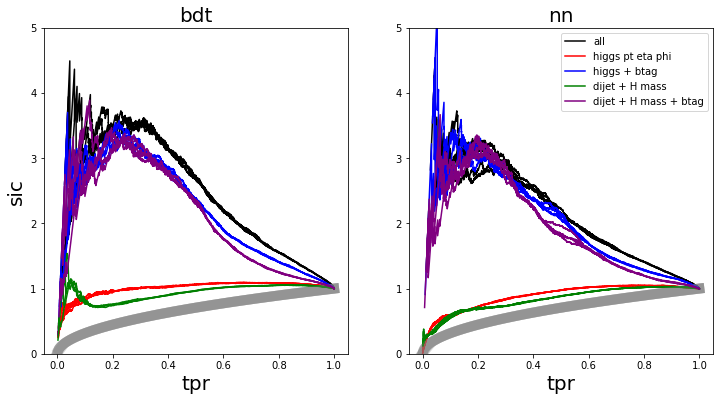

In [7]:
all_scores_bdt = {}
all_scores_nn = {}

with open(f"classifier_results/fullsup_all_bdt", "rb") as ifile:
    all_scores_bdt["all"] = pickle.load(ifile)
    
with open(f"classifier_results/fullsup_all_nn", "rb") as ifile:
    all_scores_nn["all"] = pickle.load(ifile)
    

with open(f"classifier_results/fullsup_higg_bdt", "rb") as ifile:
    all_scores_bdt["higgs"] = pickle.load(ifile)
    
with open(f"classifier_results/fullsup_higg_nn", "rb") as ifile:
    all_scores_nn["higgs"] = pickle.load(ifile)
    
    
with open(f"classifier_results/fullsup_higgwbtag_bdt", "rb") as ifile:
    all_scores_bdt["higgswbtag"] = pickle.load(ifile)
    
with open(f"classifier_results/fullsup_higgwbtag_nn", "rb") as ifile:
    all_scores_nn["higgswbtag"] = pickle.load(ifile)
    
    


with open(f"classifier_results/fullsup_mass_bdt", "rb") as ifile:
    all_scores_bdt["mass"] = pickle.load(ifile)
    
with open(f"classifier_results/fullsup_mass_nn", "rb") as ifile:
    all_scores_nn["mass"] = pickle.load(ifile)
          
with open(f"classifier_results/fullsup_masswbtag_bdt", "rb") as ifile:
    all_scores_bdt["masswbtag"] = pickle.load(ifile)
    
with open(f"classifier_results/fullsup_masswbtag_nn", "rb") as ifile:
    all_scores_nn["masswbtag"] = pickle.load(ifile)
    
    

labels_dict = {
            "mass":"dijet + H mass",
            "masswbtag":"dijet + H mass + btag",
            "higgs":"higgs pt eta phi",
            "higgswbtag":"higgs + btag",
            "all":"all",
              
              }

colors = ["black", "red", "blue", "green", "purple"]


fig, ax = plt.subplots(1, 2, figsize= (12,6))


# calculate the sic curves
with np.errstate(divide='ignore', invalid='ignore'):
    for j, run_id in enumerate(all_scores_bdt.keys()):
        print(run_id)
        for i in range(num_runs):
            if i == 0: 
                label = labels_dict[run_id]
                ax[0].plot(all_scores_bdt[run_id][i]["tpr"], np.divide(all_scores_bdt[run_id][i]["tpr"], np.sqrt(all_scores_bdt[run_id][i]["tpr"])), color = "grey", lw = 10, alpha = 0.3)
                ax[1].plot(all_scores_nn[run_id][i]["tpr"], np.divide(all_scores_nn[run_id][i]["tpr"], np.sqrt(all_scores_nn[run_id][i]["tpr"])), color = "grey", lw = 10, alpha = 0.3)

            else: label = None

            # bdt results
            sic = np.divide(all_scores_bdt[run_id][i]["tpr"], np.sqrt(all_scores_bdt[run_id][i]["fpr"]))
            ax[0].plot(all_scores_bdt[run_id][i]["tpr"], sic, color = colors[j], label = label)

            # nn results
            sic = np.divide(all_scores_nn[run_id][i]["tpr"], np.sqrt(all_scores_nn[run_id][i]["fpr"]))
            ax[1].plot(all_scores_nn[run_id][i]["tpr"], sic, color = colors[j], label = label)



f = 20
ax[0].set_xlabel("tpr", fontsize = f)
ax[0].set_ylabel("sic", fontsize = f)
ax[0].set_title("bdt", fontsize = f)
ax[0].set_ylim(0, 5)

ax[1].set_xlabel("tpr", fontsize = f)
#ax[1].set_ylabel("sic", fontsize = f)
ax[1].set_title("nn", fontsize = f)
ax[1].set_ylim(0, 5)


plt.legend()
    

plt.show()



# now analyze the samples

In [ ]:
flow_training_id = "SUSY_all"#f"Masked_PRQ_AR_{num_layers}layers_{num_hidden_features}hidden_{num_blocks}blocks_{seed}seed"

num_features = len(feature_set) - 1 # context doesn't count
seed = 8

num_layers = 2
num_hidden_features = 16
num_blocks = 4
early_stop_patience = 10

flow_training_dir = os.path.join("models", f"{flow_training_id}/")


with open(f"models/{flow_training_id}/flow_samples", "rb") as infile:
    
    data_dict = pickle.load(infile)

print(data_dict.keys())

In [ ]:
bins = np.linspace(-4.5, 4.5, 50)

for b in bands:
    
    print(b)
    
    
    fig, ax = plt.subplots(1, num_features, figsize = (20, 4))
    for i, feature in enumerate(feature_set[:-1]):
        ax[i].hist(data_dict[b][:,i], bins = bins, label = "truth", histtype = "step", density = "True")
        print(data_dict[b].shape, data_dict[f"{b}_samples"].shape)
        ax[i].hist(data_dict[f"{b}_samples"][:,i], bins = bins, label = "samples", histtype = "step", density = "true")
        ax[i].hist(full_sup_sig[:,i], bins = bins, label = "S", histtype = "step", density = "True")
        ax[i].hist(full_sup_bkg[:,i], bins = bins, label = "B", histtype = "step", density = "true")
        ax[i].set_yscale("log")
        
    ax[0].legend()
    plt.show()

In [ ]:
num_runs = 5

scores_bdt = {}


scores_bdt[run_id] = run_BDTs(data_dict["SR_samples"][:,:-1], data_dict["SR"][:,:-1], test_bkg, test_sig, num_runs)

  
    
with open(f"classifier_results/{flow_training_id}_bdt", "wb") as ofile:
    pickle.dump(scores_bdt,ofile)


In [ ]:

scores_nn = {}

for run_id in datasets.keys():
    print(run_id)
    scores_nn[run_id] = run_NNs(datasets[run_id][0], datasets[run_id][1], test_bkg[:,:-1], test_sig[:,:-1], num_runs)

    
with open(f"classifier_results/{flow_training_id}_nn", "wb") as ofile:
    pickle.dump(scores_nn, ofile)

    
    

# Load in and plot

In [ ]:
all_scores_bdt_nano = {}
all_scores_bdt_ed = {}

with open(f"classifier_results/nano_all_bdt", "rb") as ifile:
    tmp = pickle.load(ifile)
    all_scores_bdt_nano["full sup"] = tmp["full sup"]
    all_scores_bdt_nano["all"] = tmp["samples"]
    
with open(f"classifier_results/nano_mu_bdt", "rb") as ifile:
    tmp = pickle.load(ifile)
    all_scores_bdt_nano["dimu"] = tmp["samples"]
    
with open(f"classifier_results/nano_dijet_bdt", "rb") as ifile:
    tmp = pickle.load(ifile)
    all_scores_bdt_nano["dijet"] = tmp["samples"]
    
with open(f"classifier_results/nano_higgs_bdt", "rb") as ifile:
    tmp = pickle.load(ifile)
    all_scores_bdt_nano["higgs"] = tmp["samples"]

    

labels_dict = {
            "full sup":"Full. Sup.",
            "dijet":"dijet vars",
            "dimu":"dimu vars",
            "higgs":"higgs",
            "all":"all",
            
              
              }

In [ ]:
num_runs = 5

plt.figure(figsize= (8,8))
colors = ["black", "red", "blue", "green", "purple"]

# calculate the sic curves
for j, run_id in enumerate(all_scores_bdt_nano.keys()):
    for i in range(num_runs):
        if i == 0: 
            label = labels_dict[run_id]
            plt.plot(all_scores_bdt_nano[run_id][i]["tpr"], np.divide(all_scores_bdt_nano[run_id][i]["tpr"], np.sqrt(all_scores_bdt_nano[run_id][i]["tpr"])), color = "grey", lw = 10, alpha = 0.3)
        else: label = None
        with np.errstate(divide='ignore', invalid='ignore'):
            # bdt results
            sic = np.divide(all_scores_bdt_nano[run_id][i]["tpr"], np.sqrt(all_scores_bdt_nano[run_id][i]["fpr"]))
            plt.plot(all_scores_bdt_nano[run_id][i]["tpr"], sic, color = colors[j], label = label)
          
            
f = 20
plt.xlabel("tpr", fontsize = f)
plt.ylabel("sic", fontsize = f)

    
plt.legend()
    
plt.title("Nano results")

plt.show()




    
  

